In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
matches = pd.read_csv("/content/match_schedule_results.csv")
batting = pd.read_csv("/content/batting_summary.csv")
bowling = pd.read_csv("/content/bowling_summary.csv")
players = pd.read_csv("/content/world_cup_players_info.csv")

In [3]:
matches.head()
batting.head()
bowling.head()
players.head()

,player_name,team_name,image_of_player,battingStyle,bowlingStyle,playingRole,description
0,Jonny Bairstow,England,,Right-hand bat,Right-arm fast-medium,Wicketkeeper Batter,Jonny Bairstow is an English cricketer known f...
1,Joe Root,England,,Right hand Bat,Right arm Offbreak,Top order Batter,Joe Root is an English cricketer known for his...
2,Jos Buttler,England,,Right hand Bat,,Wicketkeeper Batter,Jos Buttler is an English cricketer known for ...
3,Will Young,New Zealand,,Right hand Bat,Right arm Offbreak,Top order Batter,Will Young is a New Zealand cricketer known fo...
4,Rachin Ravindra,New Zealand,,Left hand Bat,Slow Left arm Orthodox,Top order Batter,Rachin Ravindra is a New Zealand cricketer kno...


In [4]:
matches.info()
batting.info()
bowling.info()
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Match_no       48 non-null     int64 
 1   Date           48 non-null     object
 2   Venue          48 non-null     object
 3   Team1          48 non-null     object
 4   Team2          48 non-null     object
 5   Winner         48 non-null     object
 6   Scorecard URL  48 non-null     object
dtypes: int64(1), object(6)
memory usage: 2.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Match_no          916 non-null    int64 
 1   Match_Between     916 non-null    object
 2   Team_Innings      916 non-null    object
 3   Batsman_Name      916 non-null    object
 4   Batting_Position  916 non-null    int64 
 5   Dismissal         914 non-nul

In [5]:
matches.isnull().sum()

,0
Match_no,0
Date,0
Venue,0
Team1,0
Team2,0
Winner,0
Scorecard URL,0


In [6]:
batting.isnull().sum()

,0
Match_no,0
Match_Between,0
Team_Innings,0
Batsman_Name,0
Batting_Position,0
Dismissal,2
Runs,0
Balls,0
4s,0
6s,0


In [7]:
bowling.isnull().sum()

,0
Match_no,0
Match_Between,0
Bowling_Team,0
Bowler_Name,0
Overs,0
Maidens,0
Runs,0
Wickets,0
Economy,0


In [8]:
players.isnull().sum()

,0
player_name,0
team_name,0
image_of_player,66
battingStyle,0
bowlingStyle,6
playingRole,0
description,17


In [9]:
batting.fillna(0, inplace=True)
bowling.fillna(0, inplace=True)

In [10]:
players.fillna({"description": "Unknown"}, inplace=True)
players.fillna({"image_of_player": "Unknown"}, inplace=True)
players.fillna({"bowlingStyle": "NA"}, inplace=True)

In [11]:
matches.isnull().sum()
batting.isnull().sum()
bowling.isnull().sum()
players.isnull().sum()


matches.drop_duplicates(inplace=True)
batting.drop_duplicates(inplace=True)
bowling.drop_duplicates(inplace=True)
players.drop_duplicates(inplace=True)

In [12]:
batting['Runs'] = batting['Runs'].astype(int)
bowling['Wickets'] = bowling['Wickets'].astype(int)

Basic Performance Analysis

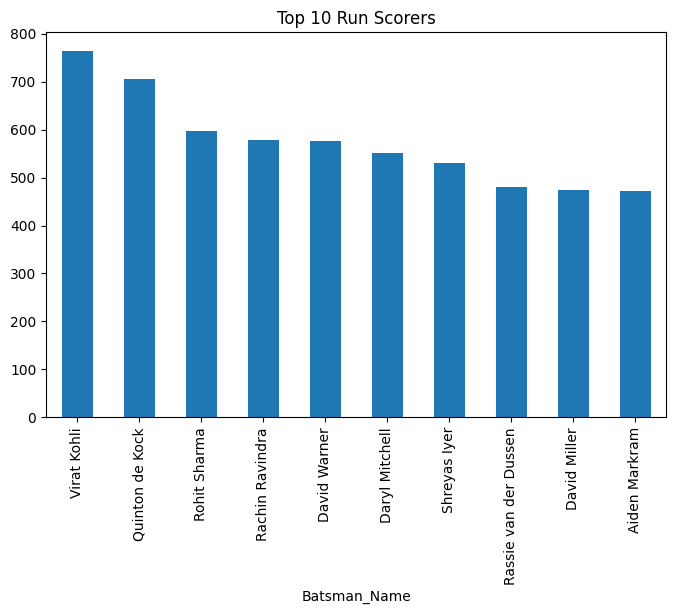

In [13]:
#Top 10 Run Scorers

top_runs = batting.groupby('Batsman_Name')['Runs'].sum().sort_values(ascending=False).head(10)

#Visualization

top_runs.plot(kind='bar', figsize=(8,5))
plt.title("Top 10 Run Scorers")
plt.show()

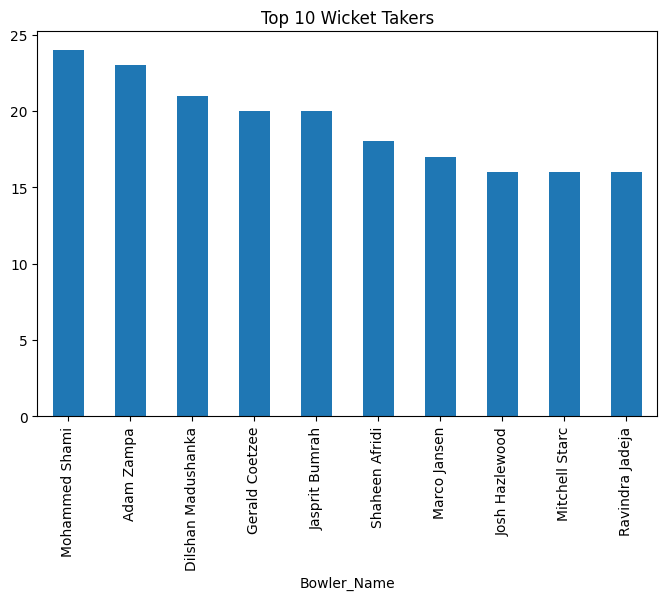

In [14]:
#Top 10 Wicket Takers

top_wickets = bowling.groupby('Bowler_Name')['Wickets'].sum().sort_values(ascending=False).head(10)

#Visualization

top_wickets.plot(kind='bar', figsize=(8,5))
plt.title("Top 10 Wicket Takers")
plt.show()

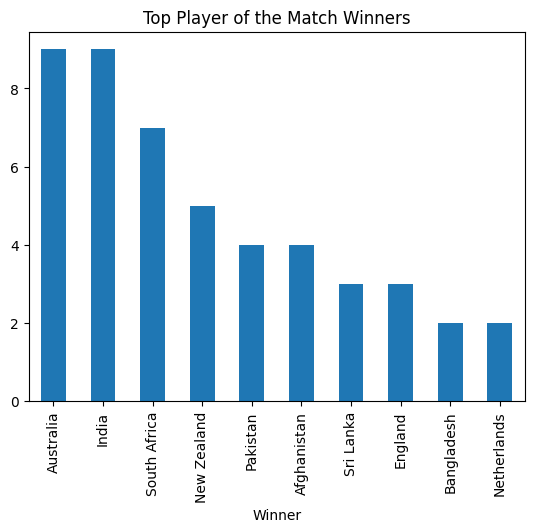

In [15]:
#Player/Winner of the Match (MoM)

mom_count = matches['Winner'].value_counts().head(10)

#Visualization

mom_count.plot(kind='bar')
plt.title("Top Player of the Match Winners")
plt.show()

Match-Level Insights

In [16]:
#Best Scorer per Match

best_scorer = batting.groupby(['Match_no', 'Batsman_Name'])['Runs'].sum().reset_index()
best_scorer = best_scorer.loc[
    best_scorer.groupby('Match_no')['Runs'].idxmax()
]

best_scorer['Batsman_Name'].value_counts().head()



,count
Batsman_Name,
Rohit Sharma,3
Daryl Mitchell,3
Ben Stokes,2
Mohammad Rizwan,2
Rassie van der Dussen,2


In [17]:
#Best Bowler per Match

best_bowler = bowling.groupby(['Match_no', 'Bowler_Name'])['Wickets'].sum().reset_index()
best_bowler = best_bowler.loc[
    best_bowler.groupby('Match_no')['Wickets'].idxmax()
]

best_bowler['Bowler_Name'].value_counts().head()

,count
Bowler_Name,
Gerald Coetzee,4
Adam Zampa,4
Mohammed Shami,3
Dilshan Madushanka,3
Lockie Ferguson,2


Simple Merging

In [18]:
#Merge Batting + Player Info

batting_players = pd.merge(
    batting,
    players,
    left_on='Batsman_Name',
    right_on='player_name',
    how='left'
)

In [19]:
#Merge Bowling + Player Info

bowling_players = pd.merge(
    bowling,
    players,
    left_on='Bowler_Name',
    right_on='player_name',
    how='left'
)

Role-Based & Team Analysis

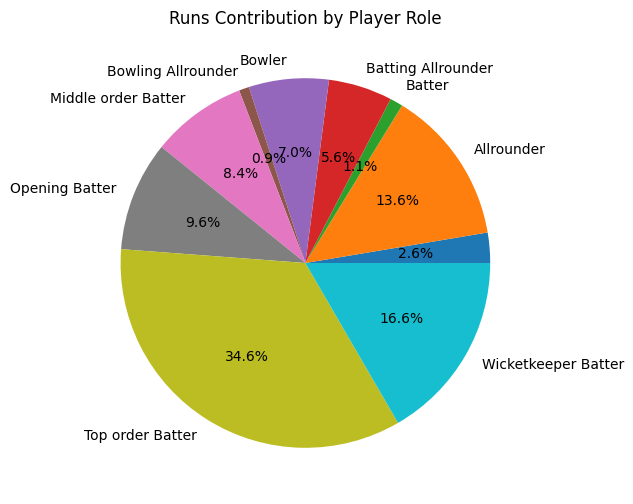

In [20]:
#Runs by Player Role

role_runs = batting_players.groupby('playingRole')['Runs'].sum()

#Visualization

role_runs.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Runs Contribution by Player Role")
plt.ylabel("")
plt.show()

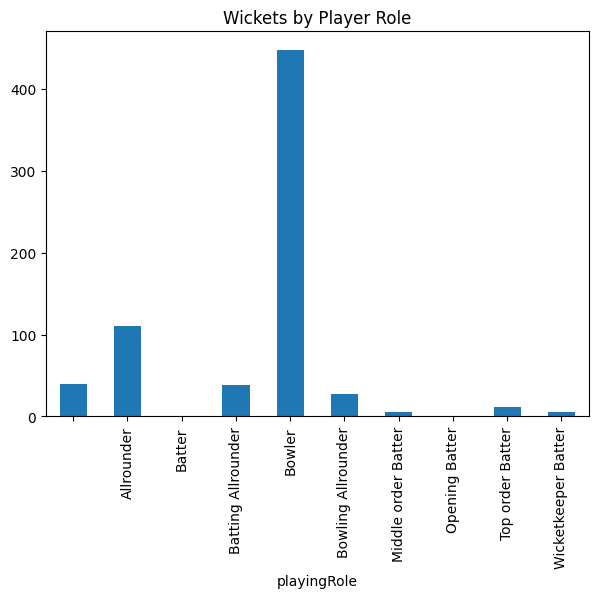

In [21]:
#Wickets by Player Role

role_wickets = bowling_players.groupby('playingRole')['Wickets'].sum()

#visualization
role_wickets.plot(kind='bar', figsize=(7,5))
plt.title("Wickets by Player Role")
plt.show()

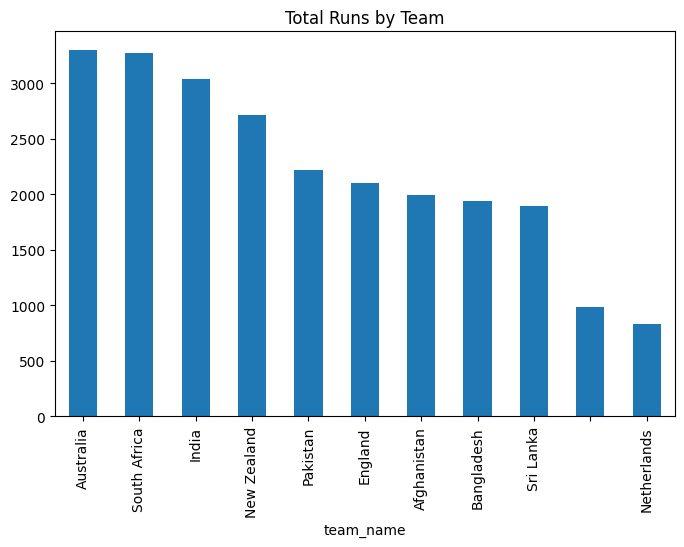

In [32]:
#Team-wise Runs

team_runs = batting_players.groupby('team_name')['Runs'].sum().sort_values(ascending=False)

#visualization
team_runs.plot(kind='bar', figsize=(8,5))
plt.title("Total Runs by Team")
plt.show()

Venue & Match Outcome Analysis

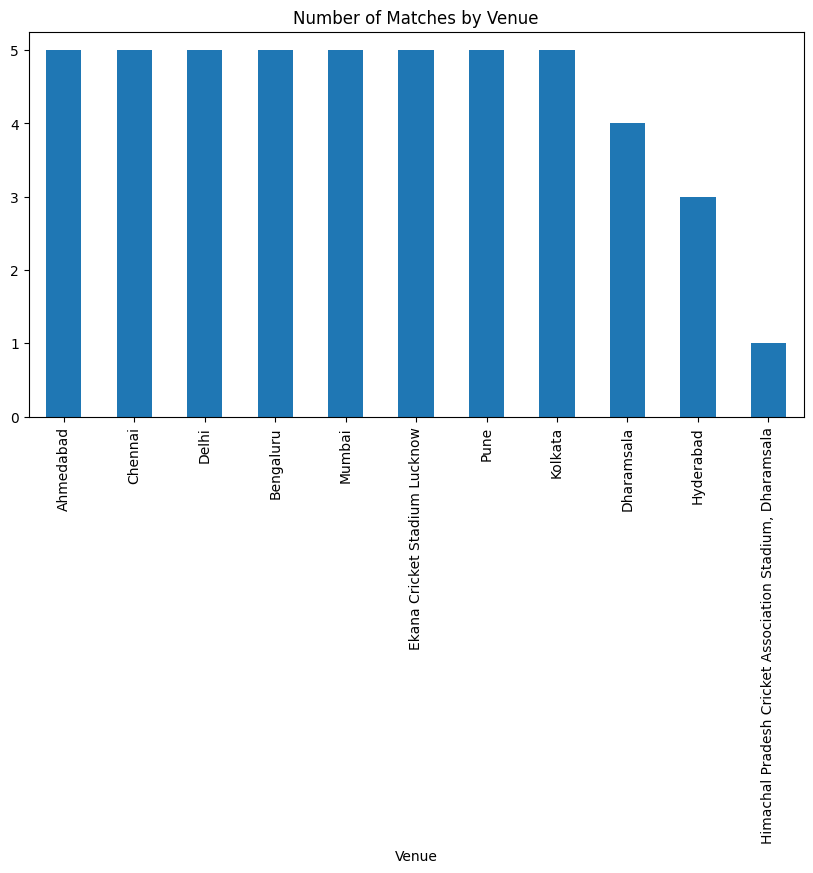

In [33]:
#Matches by Venue

matches['Venue'].value_counts().head()

#Visualization
matches['Venue'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Number of Matches by Venue")
plt.show()

Team Performance Summary

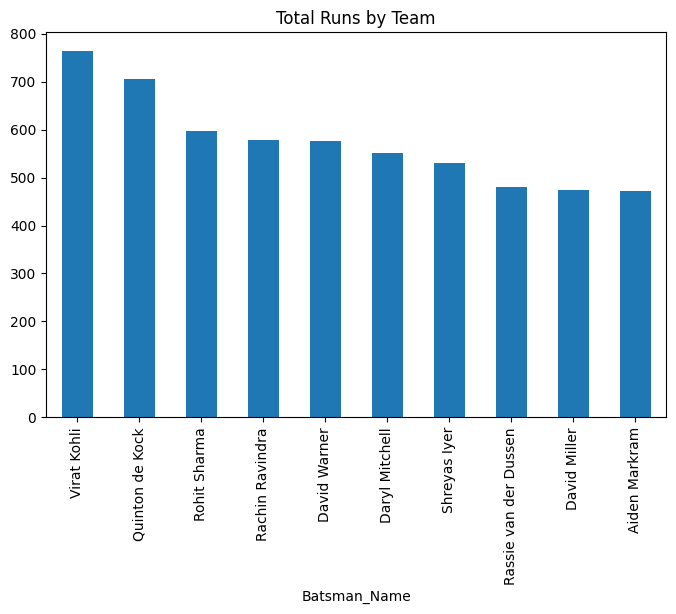

In [38]:
#Team-wise Runs

team_runs = batting.groupby('Batsman_Name')['Runs'].sum().sort_values(ascending=False).head(10)

#visualization
team_runs.plot(kind='bar', figsize=(8,5))
plt.title("Total Runs by Team")
plt.show()

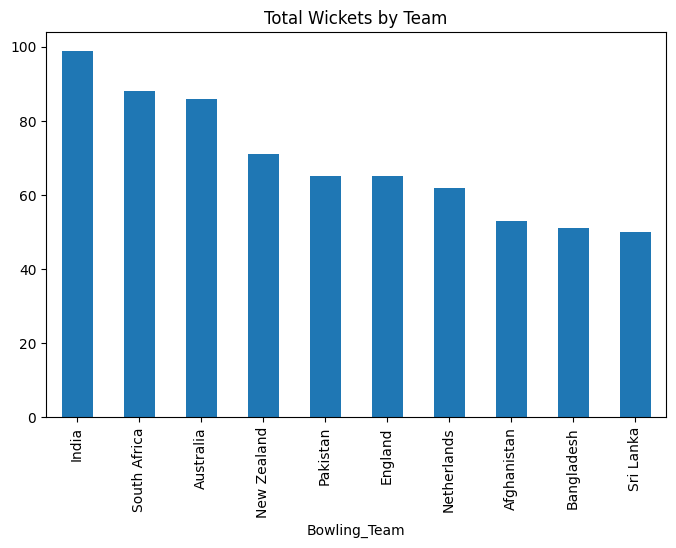

In [39]:
#Team-wise Wickets

team_wickets = bowling.groupby('Bowling_Team')['Wickets'].sum().sort_values(ascending=False).head(10)

#visualization
team_wickets.plot(kind='bar', figsize=(8,5))
plt.title("Total Wickets by Team")
plt.show()

Clean & Standardize Column Names (Combining 4 tables)

In [44]:
batting.rename(columns={
    'Batsman_Name': 'player_name',
    'Runs': 'bat_runs'
}, inplace=True)

bowling.rename(columns={
    'Bowler_Name': 'player_name',
    'Runs': 'bowl_runs',
    'Wickets': 'wickets'
}, inplace=True)

players.rename(columns={
    'team_name': 'team'
}, inplace=True)

In [45]:
#Merge Batting + Players

batting_players = pd.merge(
    batting,
    players,
    on='player_name',
    how='left'
)

In [46]:
#Merge Bowling + Players

bowling_players = pd.merge(
    bowling,
    players,
    on='player_name',
    how='left'
)

In [47]:
#Add Match Information

batting_full = pd.merge(
    batting_players,
    matches,
    on='Match_no',
    how='left'
)

bowling_full = pd.merge(
    bowling_players,
    matches,
    on='Match_no',
    how='left'
)

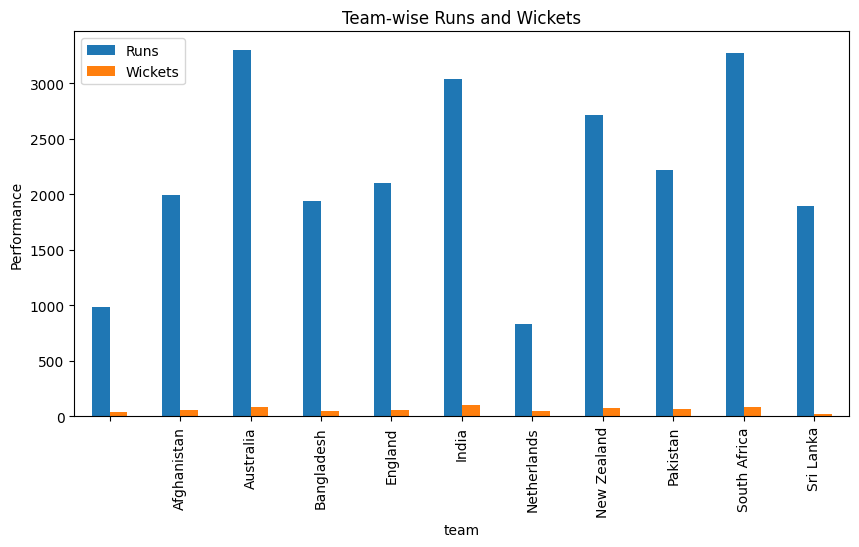

In [48]:
#Team Performance — Runs + Wickets Combined

team_runs = batting_full.groupby('team')['bat_runs'].sum()
team_wickets = bowling_full.groupby('team')['wickets'].sum()

team_performance = pd.concat([team_runs, team_wickets], axis=1)
team_performance.columns = ['Runs', 'Wickets']

#Visualization

team_performance.plot(kind='bar', figsize=(10,5))
plt.title("Team-wise Runs and Wickets")
plt.ylabel("Performance")
plt.show()

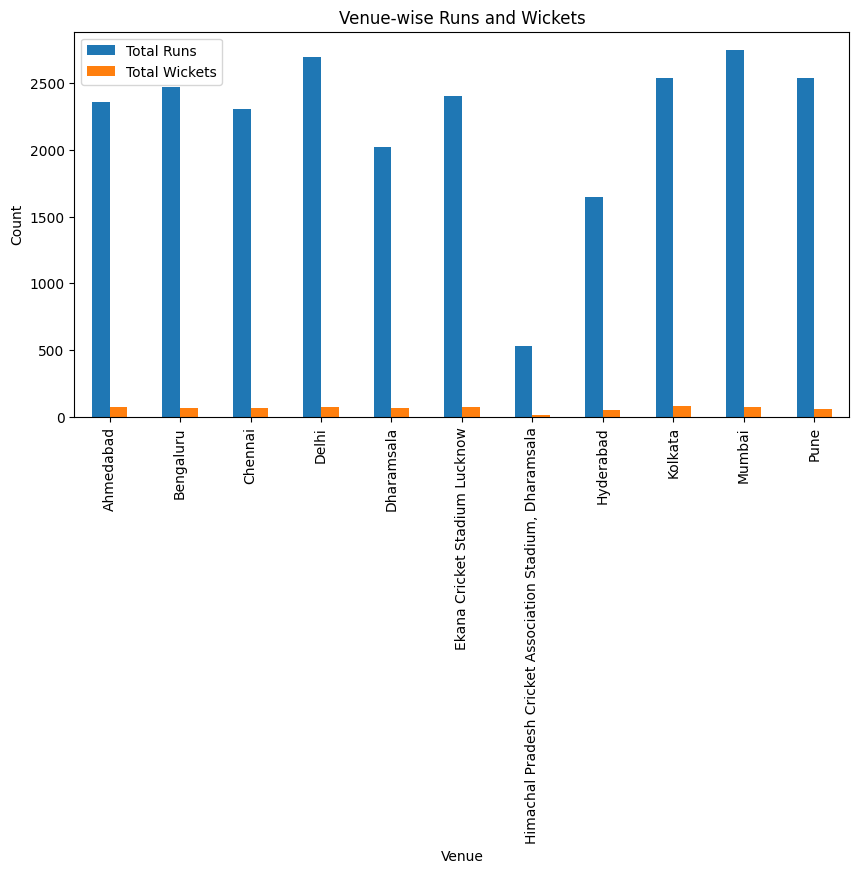

In [49]:
#Venue vs Total Runs & Wickets (Batting + Bowling + Matches)

venue_runs = batting_full.groupby('Venue')['bat_runs'].sum()
venue_wickets = bowling_full.groupby('Venue')['wickets'].sum()

venue_performance = pd.concat([venue_runs, venue_wickets], axis=1)
venue_performance.columns = ['Total Runs', 'Total Wickets']

#Visualization

venue_performance.plot(kind='bar', figsize=(10,5))
plt.title("Venue-wise Runs and Wickets")
plt.ylabel("Count")
plt.show()